Text(0.5, 1.0, 'For K value = 100')

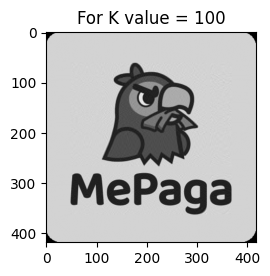

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd, eigh
import os
import cv2


plt.rcParams['figure.figsize'] = [8,4]
IMAGE_FILE = 'img/image.png'

img = cv2.imread(IMAGE_FILE)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image = gray_image.astype(np.float64)

U, S, Vt = np.linalg.svd(gray_image, full_matrices=False)

k_value = int(input())

plt.figure(figsize=(12,6))

low_rank = U[:, :k_value] @ np.diag(S[:k_value]) @ Vt[:k_value, :]
plt.subplot(2,3,1),
plt.imshow(low_rank, cmap='gray')
plt.title(f"For K value = {k_value}")




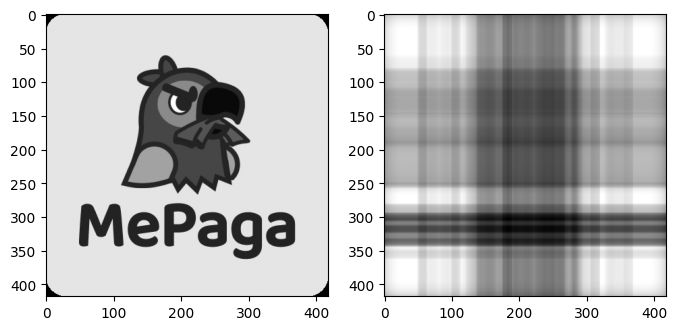

In [5]:
X = np.asarray(img)[:,:,0]
# print(X.shape)


def get_symmetrized_eigens(array):
    array = np.array(array, dtype=np.float64)
    a = np.dot(array.transpose(), array)
    return np.linalg.eigh(a)


S2,V = get_symmetrized_eigens(X)

sorted_indices = np.argsort(S2)[::-1]
S2 = S2[sorted_indices]
V = V[:, sorted_indices]

# print(S2)
S2[S2 < 0] = 0
S = np.sqrt(S2)



U = np.dot(X, V)  # Matriz U (deve ser normalizada)
U = U / [s if s!=0 else 1 for s in S]


Vt=V.T

k = int(input())

Xk = np.linalg.multi_dot([U[:,0:k],np.diag(S[0:k]),Vt[0:k,:]])



f,(ax1, ax2) = plt.subplots(1,2)

ax1.imshow(X,cmap='gray')
ax2.imshow(Xk,cmap='gray')
